# 🔄 Caminhos e Ciclos Eulerianos em Grafos

Nesta aula, vamos explorar o conceito de caminhos e ciclos eulerianos, suas definições matemáticas, propriedades, exemplos, aplicações e como identificar grafos eulerianos.

## 🎯 Objetivos

- Entender o que são caminhos e ciclos eulerianos.
- Compreender as definições matemáticas formais.
- Identificar grafos eulerianos e não eulerianos.
- Conhecer aplicações e algoritmos relacionados.
- Praticar a identificação e construção de ciclos eulerianos.

## 💡 Definições Matemáticas

- **Grafo:** $G = (V, E)$, onde $V$ é o conjunto de vértices e $E$ o conjunto de arestas.
- **Caminho Euleriano:** Um caminho em $G$ que percorre cada aresta exatamente uma vez (pode passar mais de uma vez pelo mesmo vértice).
- **Ciclo Euleriano:** Um caminho euleriano que é um ciclo, ou seja, começa e termina no mesmo vértice.

**Observação:**  
Nem todo grafo possui caminho ou ciclo euleriano. A existência depende do grau dos vértices.

## 🧮 Teorema de Euler

- Um grafo conexo possui um **ciclo euleriano** se, e somente se, todos os seus vértices têm grau par.
- Um grafo conexo possui um **caminho euleriano** (mas não ciclo) se, e somente se, exatamente dois vértices têm grau ímpar.

Essas condições são necessárias e suficientes para grafos não direcionados.

## 🕸️ Exemplo Visual

Considere o grafo abaixo:

- **Vértices:** A, B, C, D
- **Arestas:** (A, B), (A, C), (A, D), (B, C), (B, D), (C, D)

Vamos visualizar esse grafo:

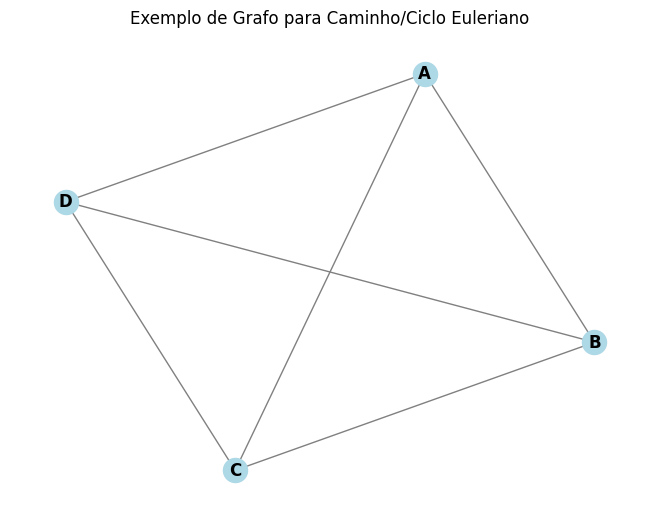

Posições dos vértices: {'A': array([0.35631846, 1.        ]), 'B': array([ 0.99392804, -0.35415491]), 'C': array([-0.35631846, -1.        ]), 'D': array([-0.99392804,  0.35415491])}


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('B', 'D'), ('C', 'D')
])

pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
plt.title("Exemplo de Grafo para Caminho/Ciclo Euleriano")
plt.show()
print("Posições dos vértices:", pos)

## 🔎 O grafo é Euleriano?

- **Grau dos vértices:**  
  - A: 3  
  - B: 3  
  - C: 3  
  - D: 3  

Todos os vértices têm grau ímpar.  
**Conclusão:**  
- Não possui ciclo euleriano.
- Não possui caminho euleriano (precisaria de exatamente dois vértices de grau ímpar).

Vamos modificar o grafo para obter um ciclo euleriano.

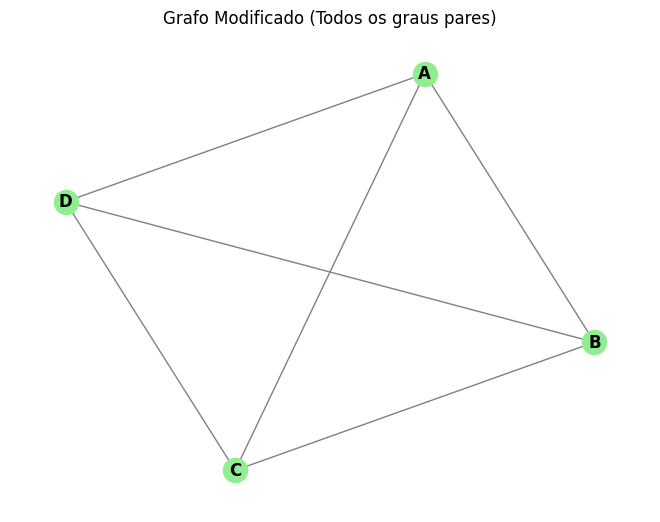

Posições dos vértices: {'A': array([0.35631846, 1.        ]), 'B': array([ 0.99392804, -0.35415491]), 'C': array([-0.35631846, -1.        ]), 'D': array([-0.99392804,  0.35415491])}


In [9]:
# Adicionando uma aresta para tornar todos os graus pares
G2 = nx.Graph()
G2.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('B', 'C'), ('B', 'D'), ('C', 'D'), ('A', 'B')
])

pos2 = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos2, with_labels=True, node_color='lightgreen', edge_color='gray', font_weight='bold')
plt.title("Grafo Modificado (Todos os graus pares)")
plt.show()
print("Posições dos vértices:", pos2)

## 🧩 Aplicações

- Problemas de roteamento (ex: coleta de lixo, carteiro chinês)
- Desenho de figuras sem levantar o lápis (problema das pontes de Königsberg)
- Circuitos elétricos

O conceito de ciclo euleriano foi motivado pelo famoso problema das pontes de Königsberg, resolvido por Leonhard Euler em 1736.

## 📝 Pseudocódigo Genérico para Encontrar um Ciclo Euleriano (Hierholzer)

```plaintext
Hierholzer(Grafo G)
    Escolha um vértice inicial v
    Enquanto houver arestas não percorridas a partir de v:
        Siga uma aresta não percorrida até retornar a v, formando um ciclo
        Enquanto houver vértice no ciclo com arestas não percorridas:
            Inicie novo ciclo a partir desse vértice e una ao ciclo principal
    Retorne o ciclo euleriano
```

## 🏆 Exercício Prático

Considere o grafo modificado acima (todos os graus pares).

1. Verifique se o grafo é euleriano.
2. Encontre um ciclo euleriano e liste a ordem das arestas percorridas.
3. Implemente em Python a busca de um ciclo euleriano e plote o ciclo passo a passo.

In [10]:
# Implementação da busca de ciclo euleriano e visualização dos passos

# Verificando se o grafo é euleriano
is_eulerian = nx.is_eulerian(G2)
print("O grafo é euleriano?", is_eulerian)

if is_eulerian:
    ciclo = list(nx.eulerian_circuit(G2))
    print("Ciclo Euleriano encontrado (arestas na ordem):", ciclo)
    # Visualizando o ciclo passo a passo
    caminho = []
    for idx, (u, v) in enumerate(ciclo):
        caminho.append((u, v))
        edge_colors = []
        for edge in G2.edges():
            if edge in caminho or (edge[1], edge[0]) in caminho:
                edge_colors.append('red')
            else:
                edge_colors.append('gray')
        plt.figure(figsize=(4,3))
        nx.draw(G2, pos2, with_labels=True, node_color='lightgreen', edge_color=edge_colors, width=2)
        plt.title(f"Passo {idx+1}: Percorrendo {u} → {v}")
        plt.show()
        print(f"Passo {idx+1}: Percorrendo {u} → {v}")
else:
    print("O grafo não é euleriano, não existe ciclo euleriano.")

O grafo é euleriano? False
O grafo não é euleriano, não existe ciclo euleriano.


## 💬 Discussão

- Por que é fácil verificar se um grafo é euleriano, mas difícil para hamiltoniano?
- Quais aplicações práticas você conhece para ciclos e caminhos eulerianos?
- O que muda se o grafo for direcionado?

# 📬 Problema do Carteiro Chinês

O problema do carteiro foi estudado pelo matemático chinês Kwan Mei-Ko em 1962 (KWAN, 1962) e consiste em encontrar um caminho fechado com custo mínimo em um grafo conexo valorado. O termo "carteiro" é uma analogia ao serviço de entrega de correspondência, imaginando que um carteiro precisaria entregar correspondência em todas as ruas de um bairro, voltando ao seu ponto de partida e, além disso, caminhando a menor distância total possível.

Se o grafo valorado for **euleriano**, a solução para o problema é trivial. Como um ciclo euleriano percorre todas as arestas somente uma vez, este já seria a rota com custo mínimo escolhida pelo carteiro e o seu custo total é igual à soma dos custos de todas as arestas.

Por outro lado, se o grafo **não for euleriano**, o requisito de passarmos por todas as ruas (isto é, todas as arestas) faz com que seja necessário definir um trajeto repetindo algumas ruas. A questão fundamental é decidir **quais ruas repetir** de forma que se acrescente o menor custo adicional possível.

## Eulerização de Grafos

Para resolver a questão de repetição das “ruas” na rota do carteiro, vejamos o processo de **eulerização** de grafos não-eulerianos, conforme descrito por Saoub (2017). Existem duas condições para um grafo não ser euleriano: não ser conexo ou não ter todos os seus vértices de grau par. O processo de eulerização de grafos conexos aborda a questão dos graus dos vértices para obter um grafo euleriano a partir de um grafo não-euleriano conexo, duplicando arestas de modo que todos os vértices passem a ter grau par e o grafo permaneça conexo.

**Definição 7.5 (Eulerização):**  
Dado um grafo conexo $G = (V, E)$, uma Eulerização de $G$ é o grafo $G_e = (V, E_e)$ tal que:
1. $G_e$ é obtido pela duplicação de arestas de $G$; e
2. todos os vértices de $G_e$ possuem grau par.

Uma maneira de se obter a eulerização de um grafo é duplicando as arestas que ligam pares de vértices de grau ímpar. Caso reste algum par de vértices de grau ímpar não adjacentes, deve-se duplicar arestas ao longo de um caminho entre estes dois vértices. Tal caminho é chamado **caminho artificial** e as arestas duplicadas são **arestas artificiais**.

Por exemplo, suponha que um grafo $G$ tenha 4 vértices de grau ímpar. Podemos obter a eulerização de $G$ criando uma aresta artificial entre dois desses vértices e um caminho artificial entre outros dois, representados por arestas tracejadas. Note que os vértices de grau par no meio de um caminho artificial continuam tendo grau par após a criação do caminho.

## Resumo do Algoritmo

1. Identifique os vértices de grau ímpar.
2. Calcule os caminhos mínimos entre todos os pares de vértices ímpares.
3. Emparelhe os vértices ímpares de modo a minimizar o custo total dos caminhos duplicados.
4. Duplique as arestas dos caminhos escolhidos.
5. O grafo resultante é euleriano. Encontre um ciclo euleriano neste grafo.

## 7.2.2 Algoritmo para o Problema do Carteiro Chinês

O pseudocódigo do algoritmo a seguir encontra a solução do problema do carteiro chinês em grafos valorados, determinando um caminho fechado com custo mínimo que passe por todas as arestas. A ideia básica é promover a eulerização do grafo, construindo caminhos artificiais com custo mínimo entre pares de vértices de grau ímpar.

**Algoritmo: CarteiroChines(G, W)**

```plaintext
// Inicialização
V_par ← {conjunto dos vértices de grau par}
Ge ← G
// Calcula os caminhos mínimos
Execute FLOYD(G, W) para construir a matriz de distâncias Dn
// Remove da matriz as linhas e colunas dos vértices de grau par
Dimpar ← Dn restrita aos vértices de grau ímpar
// Laço principal
enquanto Dimpar ≠ ∅ faça
    Determine em Dimpar o par de vértices vi e vj com menor custo dimpar_{i,j}
    Construa um caminho artificial de vi para vj com custo dimpar_{i,j} no grafo Ge
    // Remove da matriz as linhas e colunas de vi e vj
    Dimpar ← Dimpar sem as linhas e colunas de vi e vj
// Encontrando o resultado final
Encontre um ciclo euleriano do grafo Ge
```

**Resumo:**  
Inicialmente, determinam-se os vértices de grau par e cria-se um grafo $G_e$ que, ao final do algoritmo, será uma eulerização de $G$ com custo mínimo. Calcula-se a matriz de distâncias mínimas entre todos os pares de vértices (Floyd). Remove-se da matriz as linhas e colunas dos vértices de grau par, restando apenas os de grau ímpar. O laço principal encontra o par de vértices ímpares com menor custo e constrói o caminho artificial correspondente, removendo-os da matriz. O processo se repete até que todos os vértices tenham grau par. Por fim, encontra-se um ciclo euleriano no grafo resultante.

## Exemplo Visual

A Figura abaixo ilustra o processo de eulerização, onde caminhos artificiais (arestas duplicadas) são adicionados para garantir que todos os vértices tenham grau par, permitindo assim a existência de um ciclo euleriano de custo mínimo.

*(Adapte com gráficos e exemplos práticos conforme necessário em sua apresentação.)*

## Exemplo 7.3 — Primeira Iteração do Carteiro Chinês

Dado o grafo $G = (V, E)$, os vértices $v_1, v_3, v_4, v_5, v_9, v_{11}$ possuem grau ímpar, enquanto $v_2, v_6, v_7, v_8, v_{10}, v_{12}$ possuem grau par. Após calcular os caminhos mínimos entre todos os pares de vértices e eliminar da matriz $D_n$ as linhas e colunas referentes aos vértices de grau par, obtemos a matriz $D_{impar}$:

|     | v1 | v3 | v4 | v5 | v9 | v11 |
|-----|----|----|----|----|----|-----|
| v1  |  0 | 20 | 15 | 11 | 19 | 22  |
| v3  | 20 |  0 | 19 | 20 | 24 | 12  |
| v4  | 15 | 19 |  0 | 17 | 19 |  7  |
| v5  | 11 | 20 | 17 |  0 | 30 | 24  |
| v9  | 19 | 24 | 19 | 30 |  0 | 12  |
| v11 | 22 | 12 |  7 | 24 | 12 |  0  |

A seguir, implementamos o algoritmo do carteiro chinês para esse cenário, plotando e printando cada passo.

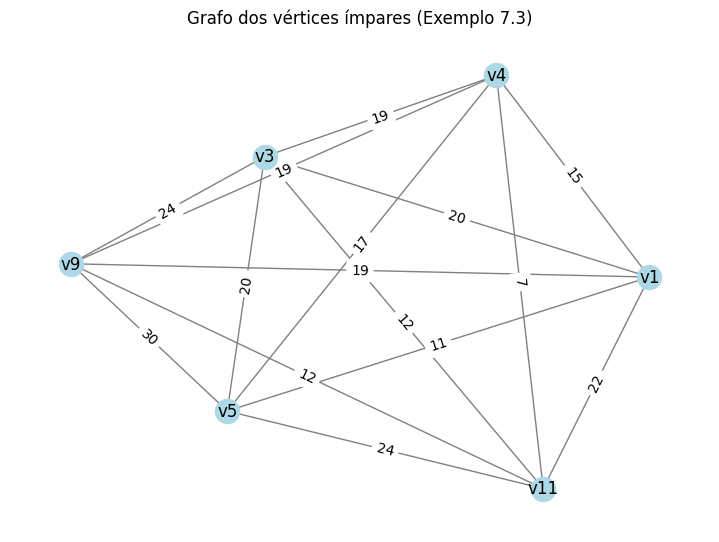

Matriz Dimpar:
     v1 v3 v4 v5 v9 v11
v1: [ 0 20 15 11 19 22]
v3: [20  0 19 20 24 12]
v4: [15 19  0 17 19  7]
v5: [11 20 17  0 30 24]
v9: [19 24 19 30  0 12]
v11: [22 12  7 24 12  0]

Menor caminho artificial: v4 ↔ v11 com custo 7


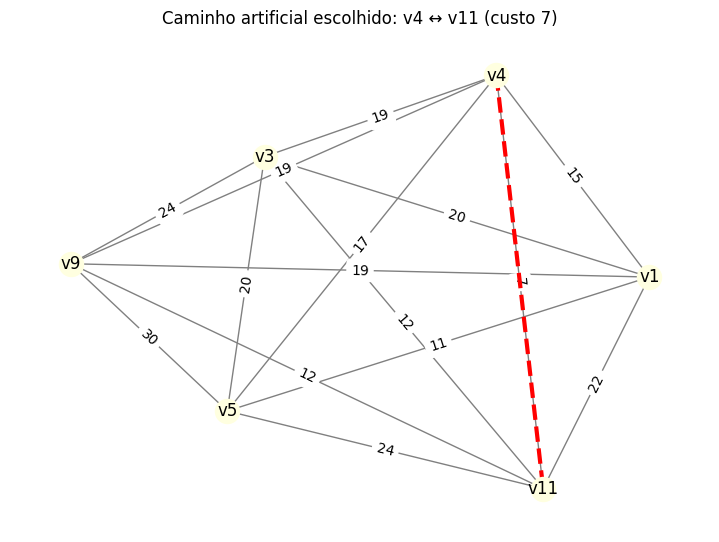

Duplicando o caminho entre v4 e v11.
Vértices ímpares restantes após a primeira iteração: ['v1', 'v3', 'v5', 'v9']


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Grafo do exemplo (apenas estrutura simplificada para fins didáticos)
G = nx.Graph()
arestas = [
    ('v1', 'v4', 15), ('v1', 'v5', 11), ('v1', 'v9', 19), ('v1', 'v11', 22), ('v1', 'v3', 20),
    ('v3', 'v4', 19), ('v3', 'v5', 20), ('v3', 'v9', 24), ('v3', 'v11', 12),
    ('v4', 'v5', 17), ('v4', 'v9', 19), ('v4', 'v11', 7),
    ('v5', 'v9', 30), ('v5', 'v11', 24),
    ('v9', 'v11', 12)
]
G.add_weighted_edges_from(arestas)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Grafo dos vértices ímpares (Exemplo 7.3)")
plt.show()

# Matriz Dimpar (manual, conforme exemplo)
impares = ['v1', 'v3', 'v4', 'v5', 'v9', 'v11']
Dimpar = np.array([
    [ 0, 20, 15, 11, 19, 22],
    [20,  0, 19, 20, 24, 12],
    [15, 19,  0, 17, 19,  7],
    [11, 20, 17,  0, 30, 24],
    [19, 24, 19, 30,  0, 12],
    [22, 12,  7, 24, 12,  0]
])

print("Matriz Dimpar:")
print("    ", " ".join(impares))
for i, v in enumerate(impares):
    print(f"{v}: {Dimpar[i]}")

# Passo 1: Encontrar o menor valor fora da diagonal (menor caminho artificial)
min_val = np.inf
min_i, min_j = -1, -1
for i in range(len(impares)):
    for j in range(len(impares)):
        if i != j and Dimpar[i, j] < min_val:
            min_val = Dimpar[i, j]
            min_i, min_j = i, j

print(f"\nMenor caminho artificial: {impares[min_i]} ↔ {impares[min_j]} com custo {min_val}")

# Plotando o caminho artificial escolhido
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=[(impares[min_i], impares[min_j])], edge_color='red', width=3, style='dashed')
plt.title(f"Caminho artificial escolhido: {impares[min_i]} ↔ {impares[min_j]} (custo {min_val})")
plt.show()

print(f"Duplicando o caminho entre {impares[min_i]} e {impares[min_j]}.")

# Remover linhas/colunas correspondentes e repetir o processo (simulação)
restantes = [v for k, v in enumerate(impares) if k not in [min_i, min_j]]
print("Vértices ímpares restantes após a primeira iteração:", restantes)

## Exemplo 7.3 — Iterações do Carteiro Chinês

Vamos simular as três iterações principais do algoritmo do carteiro chinês para o grafo do exemplo, mostrando a matriz $D_{impar}$ e os caminhos artificiais escolhidos em cada passo.

Matriz Dimpar (iteração 1):
     v1 v3 v4 v5 v9 v11
v1: [ 0 20 15 11 19 22]
v3: [20  0 19 20 24 12]
v4: [15 19  0 17 19  7]
v5: [11 20 17  0 30 24]
v9: [19 24 19 30  0 12]
v11: [22 12  7 24 12  0]


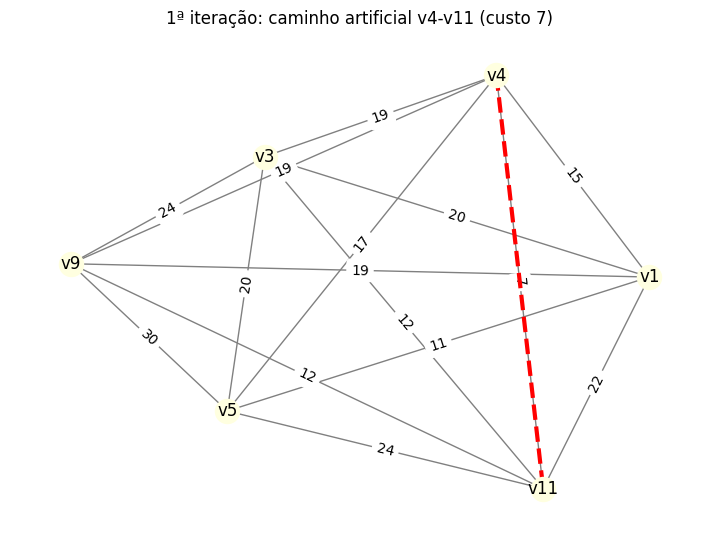

Duplicando o caminho entre v4 e v11 (custo 7).

Matriz Dimpar (iteração 2):
     v1 v3 v5 v9
v1: [ 0 20 11 19]
v3: [20  0 19 24]
v5: [11 20  0 30]
v9: [19 24 30  0]


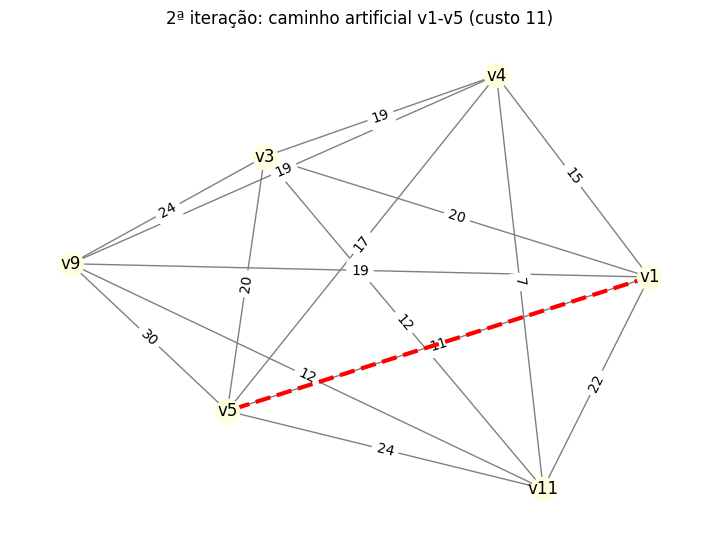

Duplicando o caminho entre v1 e v5 (custo 11).

Matriz Dimpar (iteração 3):
     v3 v9
v3: [ 0 24]
v9: [24  0]


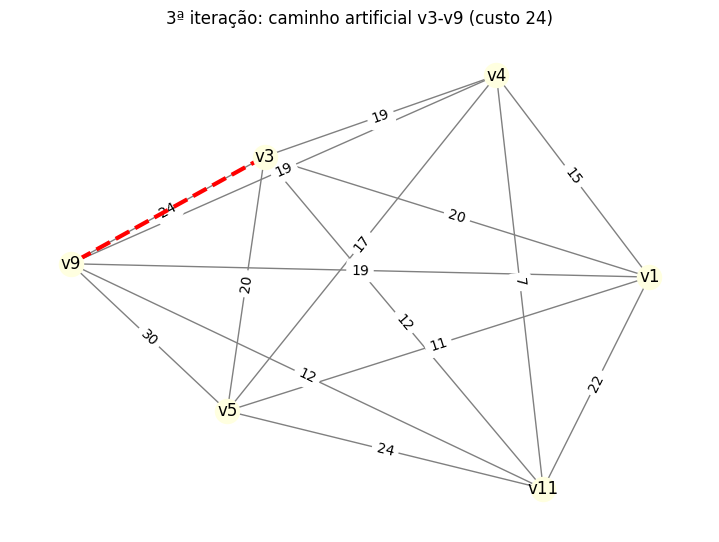

Duplicando o caminho entre v3 e v9 (custo 24).

Após as três iterações, todos os vértices têm grau par. O grafo está eulerizado e pronto para encontrar um ciclo euleriano.


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Grafo dos vértices ímpares (estrutura didática)
G = nx.Graph()
arestas = [
    ('v1', 'v4', 15), ('v1', 'v5', 11), ('v1', 'v9', 19), ('v1', 'v11', 22), ('v1', 'v3', 20),
    ('v3', 'v4', 19), ('v3', 'v5', 20), ('v3', 'v9', 24), ('v3', 'v11', 12),
    ('v4', 'v5', 17), ('v4', 'v9', 19), ('v4', 'v11', 7),
    ('v5', 'v9', 30), ('v5', 'v11', 24),
    ('v9', 'v11', 12)
]
G.add_weighted_edges_from(arestas)
pos = nx.spring_layout(G, seed=42)

# Iteração 1
impares1 = ['v1', 'v3', 'v4', 'v5', 'v9', 'v11']
Dimpar1 = np.array([
    [ 0, 20, 15, 11, 19, 22],
    [20,  0, 19, 20, 24, 12],
    [15, 19,  0, 17, 19,  7],
    [11, 20, 17,  0, 30, 24],
    [19, 24, 19, 30,  0, 12],
    [22, 12,  7, 24, 12,  0]
])
print("Matriz Dimpar (iteração 1):")
print("    ", " ".join(impares1))
for i, v in enumerate(impares1):
    print(f"{v}: {Dimpar1[i]}")

# Menor valor: v4-v11 (7)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=[('v4', 'v11')], edge_color='red', width=3, style='dashed')
plt.title("1ª iteração: caminho artificial v4-v11 (custo 7)")
plt.show()
print("Duplicando o caminho entre v4 e v11 (custo 7).")

# Iteração 2
impares2 = ['v1', 'v3', 'v5', 'v9']
Dimpar2 = np.array([
    [ 0, 20, 11, 19],
    [20,  0, 19, 24],
    [11, 20,  0, 30],
    [19, 24, 30,  0]
])
print("\nMatriz Dimpar (iteração 2):")
print("    ", " ".join(impares2))
for i, v in enumerate(impares2):
    print(f"{v}: {Dimpar2[i]}")

# Menor valor: v1-v5 (11)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=[('v1', 'v5')], edge_color='red', width=3, style='dashed')
plt.title("2ª iteração: caminho artificial v1-v5 (custo 11)")
plt.show()
print("Duplicando o caminho entre v1 e v5 (custo 11).")

# Iteração 3
impares3 = ['v3', 'v9']
Dimpar3 = np.array([
    [ 0, 24],
    [24,  0]
])
print("\nMatriz Dimpar (iteração 3):")
print("    ", " ".join(impares3))
for i, v in enumerate(impares3):
    print(f"{v}: {Dimpar3[i]}")

# Menor valor: v3-v9 (24)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightyellow', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
nx.draw_networkx_edges(G, pos, edgelist=[('v3', 'v9')], edge_color='red', width=3, style='dashed')
plt.title("3ª iteração: caminho artificial v3-v9 (custo 24)")
plt.show()
print("Duplicando o caminho entre v3 e v9 (custo 24).")

print("\nApós as três iterações, todos os vértices têm grau par. O grafo está eulerizado e pronto para encontrar um ciclo euleriano.")

In [ ]:
# Exemplo 7.3 — Algoritmo do Carteiro Chinês passo a passo (com prints e plots)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Grafo dos vértices ímpares (estrutura didática)
G = nx.Graph()
arestas = [
    ('v1', 'v4', 15), ('v1', 'v5', 11), ('v1', 'v9', 19), ('v1', 'v11', 22), ('v1', 'v3', 20),
    ('v3', 'v4', 19), ('v3', 'v5', 20), ('v3', 'v9', 24), ('v3', 'v11', 12),
    ('v4', 'v5', 17), ('v4', 'v9', 19), ('v4', 'v11', 7),
    ('v5', 'v9', 30), ('v5', 'v11', 24),
    ('v9', 'v11', 12)
]
G.add_weighted_edges_from(arestas)
pos = nx.spring_layout(G, seed=42)

# Passo 0: Mostrar o grafo inicial e os vértices ímpares
graus = dict(G.degree())
impares = [v for v, g in graus.items() if g % 2 == 1]
print("Passo 0: Grafo inicial")
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Passo 0: Grafo inicial")
plt.show()
print("Vértices de grau ímpar:", impares)

# Matriz Dimpar inicial (manual, conforme exemplo)
Dimpar = np.array([
    [ 0, 20, 15, 11, 19, 22],
    [20,  0, 19, 20, 24, 12],
    [15, 19,  0, 17, 19,  7],
    [11, 20, 17,  0, 30, 24],
    [19, 24, 19, 30,  0, 12],
    [22, 12,  7, 24, 12,  0]
])
impares_atual = impares.copy()

passo = 1
while len(impares_atual) > 0:
    print(f"\nPasso {passo}: Matriz Dimpar atual")
    print("    ", " ".join(impares_atual))
    for i, v in enumerate(impares_atual):
        print(f"{v}: {Dimpar[i][:len(impares_atual)]}")

    # Encontrar o menor valor fora da diagonal
    min_val = np.inf
    min_i, min_j = -1, -1
    for i in range(len(impares_atual)):
        for j in range(len(impares_atual)):
            if i != j and Dimpar[i, j] < min_val:
                min_val = Dimpar[i, j]
                min_i, min_j = i, j

    u, v = impares_atual[min_i], impares_atual[min_j]
    print(f"Menor caminho artificial: {u} ↔ {v} com custo {min_val}")

    # Plotando o caminho artificial escolhido
    plt.figure(figsize=(7,5))
    nx.draw(G, pos, with_labels=True, node_color='lightyellow', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='red', width=3, style='dashed')
    plt.title(f"Passo {passo}: Caminho artificial escolhido: {u} ↔ {v} (custo {min_val})")
    plt.show()
    print(f"Duplicando o caminho entre {u} e {v} (custo {min_val}).")

    # Remover linhas/colunas correspondentes
    indices_restantes = [k for k in range(len(impares_atual)) if k not in [min_i, min_j]]
    impares_atual = [impares_atual[k] for k in indices_restantes]
    Dimpar = Dimpar[np.ix_(indices_restantes, indices_restantes)]
    print("Vértices ímpares restantes após esta iteração:", impares_atual)
    passo += 1

print("\nTodos os vértices agora têm grau par. O grafo está eulerizado e pronto para encontrar um ciclo euleriano.")